In [1]:
from pathlib import Path

import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from glacierData import glacierData

In [2]:
gd = glacierData()
gd.calc_response_time()
gd.calc_diseq()
d = gd.rgi

/Users/drotto/src/USGS/glacier-diseq/pub/thickness.py:9: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  f_geom = pickle.load(f)


[0.00851064 0.01420213 0.01989362 0.02558511 0.0312766  0.03696809
 0.04265957 0.04835106 0.05404255 0.05973404 0.06542553 0.07111702
 0.07680851 0.0825     0.08819149 0.09388298 0.09957447 0.10526596
 0.11095745 0.11664894 0.12234043 0.12803191 0.1337234  0.13941489
 0.14510638 0.15079787 0.15648936 0.16218085 0.16787234 0.17356383
 0.17925532 0.18494681 0.1906383  0.19632979 0.20202128 0.20771277
 0.21340426 0.21909574 0.22478723 0.23047872 0.23617021 0.2418617
 0.24755319 0.25324468 0.25893617 0.26462766 0.27031915 0.27601064
 0.28170213 0.28739362 0.29308511 0.2987766  0.30446809 0.31015957
 0.31585106 0.32154255 0.32723404 0.33292553 0.33861702 0.34430851]
[0.35  0.338 0.326 0.314 0.302 0.29  0.278 0.266 0.254 0.242 0.23  0.218
 0.206 0.194 0.182 0.17  0.158 0.146 0.134 0.122 0.11  0.098 0.086 0.074
 0.062]
[0.05       0.07090909 0.09181818 0.11272727 0.13363636 0.15454545
 0.17545455 0.19636364 0.21727273 0.23818182 0.25909091 0.28
 0.30090909 0.32181818 0.34272727 0.36363636 0.3

,linear,gwi,pwl,be_ak,be_ak_uf
1880,0.008511,0.008511,0.008511,0.000000,NaN
1881,0.017021,0.010175,0.014202,-0.016936,-0.118400
1882,0.025532,0.011840,0.019894,-0.032640,-0.357667
1883,0.034043,0.013504,0.025585,-0.047066,0.192083
1884,0.042553,0.015169,0.031277,-0.060182,-0.233250
...,...,...,...,...,...
2016,1.165957,1.123636,1.116364,1.083285,2.875000
2017,1.174468,1.142727,1.137273,1.080511,2.337667
2018,1.182979,1.161818,1.158182,1.076136,3.111750
2019,1.191489,1.180909,1.179091,1.070497,2.930917


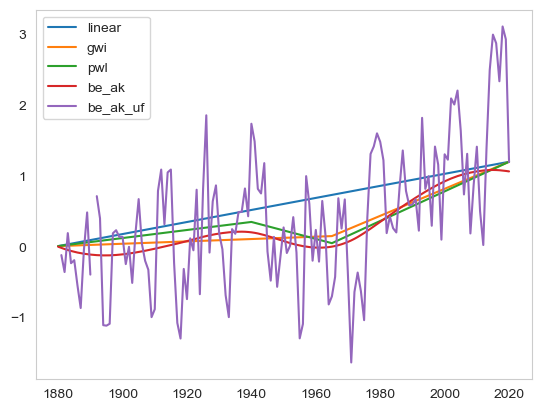

In [3]:
idx = np.arange(1880, 2021, 1)
df = pd.DataFrame([], index=idx)

# linear trend
df['linear'] = np.linspace(0, 1.2, 142)[1:]

# Synthetic GWI
# ts1 = np.linspace(df.linear.iloc[0], 0.15, 86)[:-1]
# ts2 = np.linspace(ts1[-1], df.linear.iloc[-1], 56)
# df['gwi'] = np.concatenate([ts1, ts2])

ts1 = np.linspace(df.linear.iloc[0], 0.15, 86)[:-1]
ts2 = np.linspace(0.15, df.linear.iloc[-1], 56)
df['gwi'] = np.concatenate([ts1, ts2])

# follow linear trend at start
# ts1 = np.linspace(df.linear.iloc[0], 0.35, 60)[:-1]
# ts2 = np.linspace(ts1[-2], 0.05, 28)[:-1]
# ts3 = np.linspace(ts2[-2], df.linear.iloc[-1], 55)
ts1 = np.linspace(df.linear.iloc[0], 0.35, 61)[:-1]
ts2 = np.linspace(0.35, 0.05, 26)[:-1]
ts3 = np.linspace(0.05, df.linear.iloc[-1], 56)
print(ts1)
print(ts2)
print(ts3)
df['pwl'] = np.concatenate([ts1, ts2, ts3])

# berk earth AK-avg temp
fp = Path(r'~/src/USGS/glacier_data/berkeley_earth/alaska-TAVG-Trend_clean.csv')
be = pd.read_csv(fp)
be = be.groupby('year').mean()
be = be['annual']
be_uf = be.copy()
be = be.fillna(method='bfill')
sos = sci.signal.butter(2, 1/30, btype='lowpass', output='sos')  # units are half-cycles/sample, so 1/15 = 1 cycle per 30 yrs.
be = pd.Series(sci.signal.sosfiltfilt(sos, be), index=be.index)
be = be.loc[1880:]
be = (be - be.iloc[0])/df['linear'].iloc[-1]
#be.iloc[0] = 0
df['be_ak'] = be
df['be_ak_uf'] = be_uf




fig, ax = plt.subplots(1,1)
df.plot(ax=ax)
ax.legend()
ax.grid()

df